In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('Housing.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.shape

(545, 13)

In [ ]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [ ]:
df.nunique()

,0
price,219
area,284
bedrooms,6
bathrooms,4
stories,4
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2


In [ ]:
# check for inconsistency in the categorical variable
object = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea','furnishingstatus']

for col in object:
  print(f"unique values in {col}:")
  print(df[col].unique())
  print()

unique values in mainroad:
['yes' 'no']

unique values in guestroom:
['no' 'yes']

unique values in basement:
['no' 'yes']

unique values in hotwaterheating:
['no' 'yes']

unique values in airconditioning:
['yes' 'no']

unique values in prefarea:
['yes' 'no']

unique values in furnishingstatus:
['furnished' 'semi-furnished' 'unfurnished']



In [ ]:
# checking for missing value
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Exploratory Data Analysis

In [ ]:
# seperating numerical column form categorial column
numerical_var = df.select_dtypes(include=['int' , 'float']).columns
categorical_var = df.select_dtypes(include=['object']).columns

print("numerical_var:", numerical_var)
print("categorical_var:", categorical_var)

numerical_var: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')
categorical_var: Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


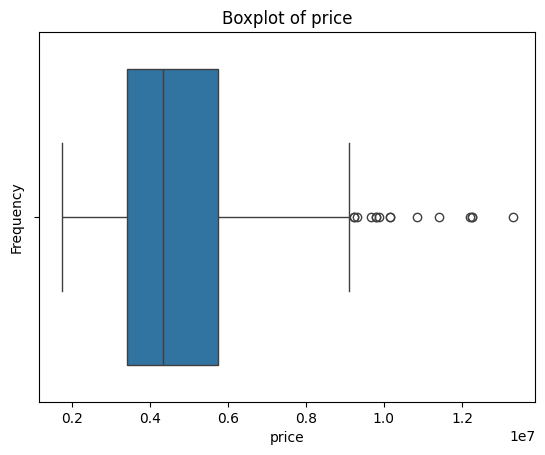

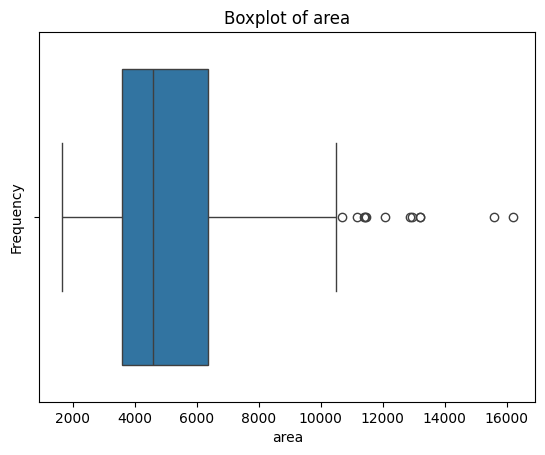

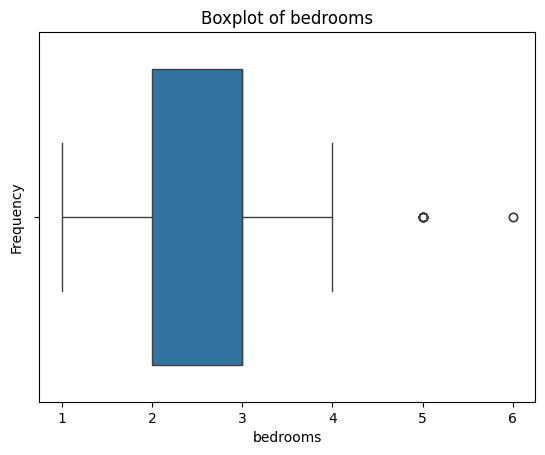

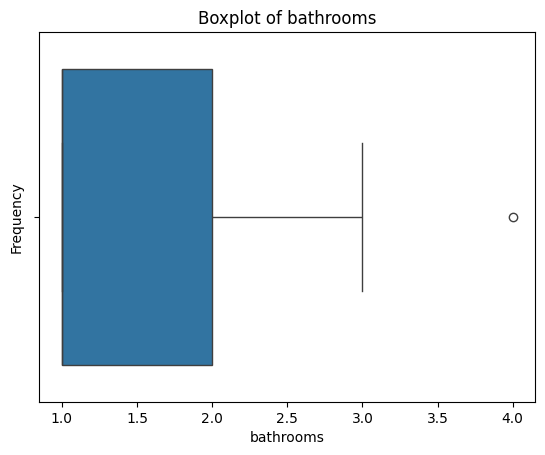

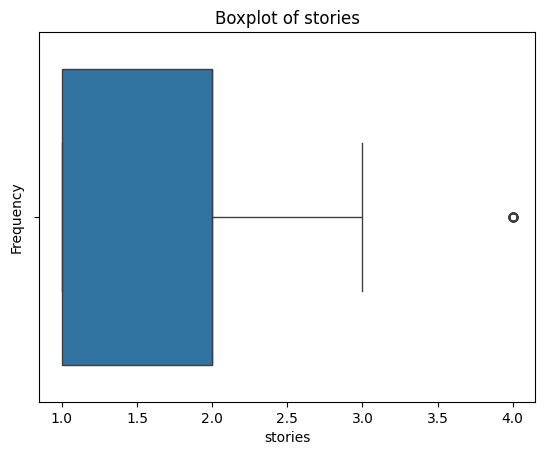

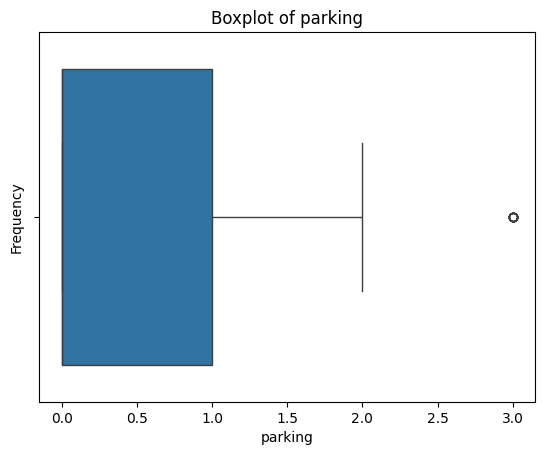

In [ ]:
#ploting boxplot for numerical var
for var in numerical_var:
  sns.boxplot(data=df, x=var)
  plt.title(f'Boxplot of {var}')
  plt.xlabel(var)
  plt.ylabel('Frequency')
  plt.show()

from the boxplot price and area has several outliers and the distribution is right skewwd which will negatively affect the linear regression model

To treate the outlier i will capp the price and area which is a safer chioce since its  prevents extreme values from skewing the model without losing data.

In [ ]:
# treating outliers in price using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#cap the outlier
df['price_capped'] = df['price'].clip(lower=lower_bound, upper=upper_bound)



In [ ]:
# treating outliers in area using IQR
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#cap the outlier
df['area_capped'] = df['area'].clip(lower=lower_bound, upper=upper_bound)


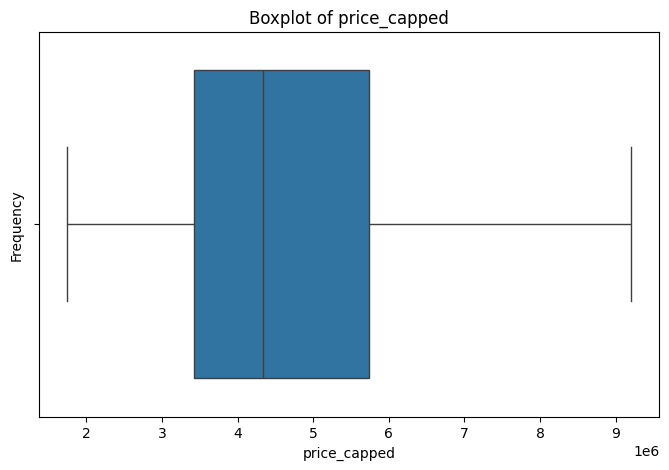

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='price_capped')
plt.title(f'Boxplot of price_capped')
plt.xlabel('price_capped')
plt.ylabel('Frequency')
plt.show()

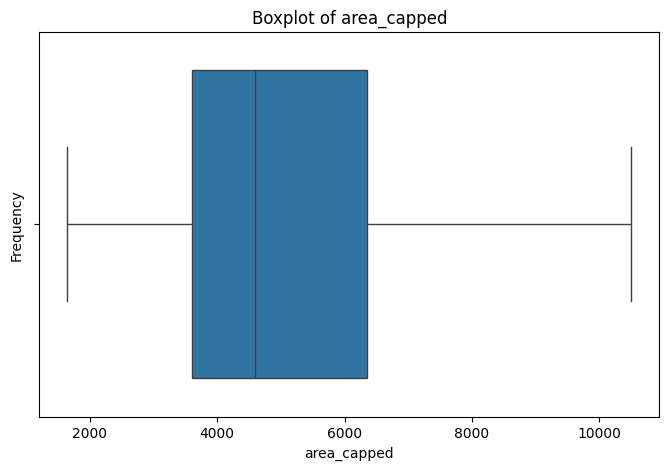

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='area_capped')
plt.title(f'Boxplot of area_capped')
plt.xlabel('area_capped')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_capped,area_capped
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,9205000,7420
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,9205000,8960
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,9205000,9960
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,9205000,7500
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,9205000,7420


In [ ]:
# converting categorial variables(yes/no) to binary
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
               'airconditioning', 'prefarea']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

#Convert 'furnishingstatus' (multi-category) to dummy variables
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price_capped,area_capped,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,9205000,7420,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,9205000,8960,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,9205000,9960,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,9205000,7500,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,9205000,7420,False,False


In [ ]:
# commute the correlation matrix
correlation_matrix = df.corr()

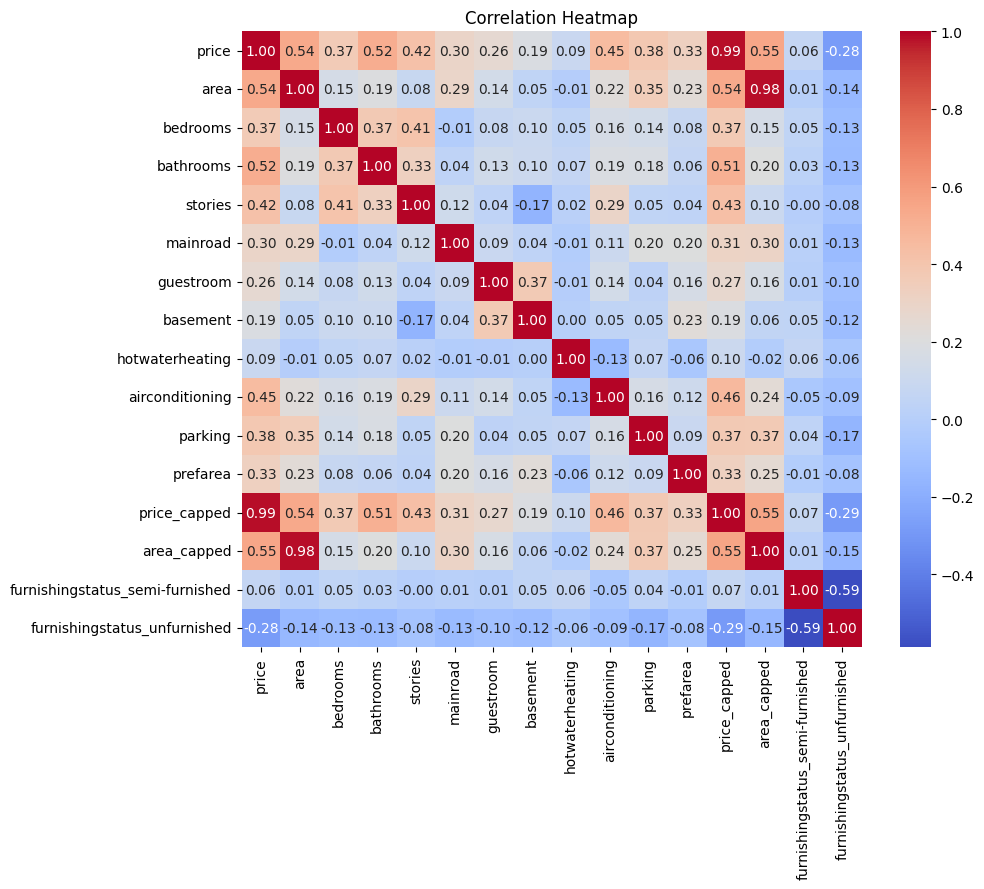

In [ ]:
#plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


  KEY INSIGHT

1. price_capped (0.99):Has a strong positive correlation with price, this is expected as its derived from price.

2. area (0.54):Has postive correlation which shows that larger properties tend to be more expensive.

3. bathrooms (0.52):Has a postive correlation which shows that the more the bathrooms the higher the price.

4. airconditioning (0.45): Houses with air conditioning tend to have higher prices.

5. stories (0.42) and bedrooms (0.37): More stories and bedrooms generally correlate with higher prices.

6. area_capped (0.55): Also expected if it’s a capped version of area.

IN SUMMARY

1. Price is most influenced by:

Area, Bathrooms, Air conditioning, Stories,Furnishing status (furnished is positively correlated; unfurnished negatively)

2. Furnishing matters: Unfurnished houses tend to be cheaper, while furnished or semi-furnished houses are associated with higher prices.

3. Features like air conditioning and parking moderately increase the price





Feature selection

In [ ]:
 #View correlation with the target variable 'price'
correlations = df.corr()['price'].sort_values(ascending=False)
print("Correlation with price:\n", correlations)

Correlation with price:
 price                              1.000000
price_capped                       0.987120
area_capped                        0.549576
area                               0.535997
bathrooms                          0.517545
airconditioning                    0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea                           0.329777
mainroad                           0.296898
guestroom                          0.255517
basement                           0.187057
hotwaterheating                    0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# select features that are high correlation with 'price'
feature_sel = ['area', 'bathrooms', 'stories', 'airconditioning',
                     'parking', 'bedrooms', 'furnishingstatus_unfurnished']

In [ ]:
# defining the features X and the target Y
X = df[feature_sel]
y = df['price']

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training

In [ ]:
#Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance (Original Price):")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Model Performance (Original Price):
Mean Squared Error: 1998062879950.31
R-squared Score: 0.60


In [ ]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 1413528.52


In [ ]:
#Display feature coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\n Model Coefficients:")
print(coefficients)


 Model Coefficients:
                        Feature   Coefficient
0                          area  2.783595e+02
1                     bathrooms  1.104107e+06
2                       stories  3.487038e+05
3               airconditioning  8.688580e+05
4                       parking  2.514104e+05
5                      bedrooms  1.266752e+05
6  furnishingstatus_unfurnished -4.737068e+05


This coefficient analysis helps you understand how each feature affects housing price in a linear fashion.

Key Insights

1. Bathrooms have the highest positive impact on price. Homes with more bathrooms are much more valuable.

2. Air conditioning also adds significant value to the home.

3. Furnishing status plays a role: unfurnished homes are valued less, which may be expected in markets where buyers prefer move-in-ready homes.

4. Area, while still positively related, has a smaller per-unit impact compared to features like bathrooms or air conditioning — but since it usually has a larger numeric range, its overall influence is still large.

5. Parking, bedrooms, and stories also have a moderate, positive impact.



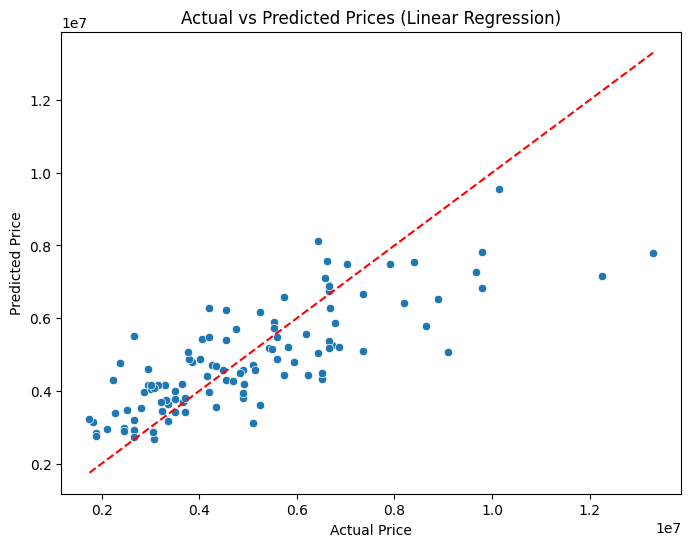

In [ ]:
#Visualize actual vs predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.show()

This scatter plot compares the actual house prices (x-axis) against the predicted prices  (y-axis).

1. The red dashed line represents the ideal scenario where predicted prices = actual prices. Any point on the line means the model predicted that house’s price perfectly.

2. Many data points are clustered around the line, especially in the lower-to-mid price range, indicating reasonably accurate predictions.

3. Some scatter is evident, especially for higher-priced properties—this suggests the model struggles more with very high-value properties.


SUMMARY

The linear regression model performs reasonably well, capturing the general trend between housing features and price.

However, the spread of points away from the red line indicates that there’s room for improvement, especially at the extremes.



In [ ]:
intercept = model.intercept_
print("Intercept:", intercept)

Intercept: 587139.0556449476
